In [1]:

from matplotlib import pyplot as plt
import nltk
import pandas as pd
import numpy as np
import sys
import os

from data_loader import DataLoader

In [4]:
#load kindle_store 5-core data
loader = DataLoader(DataLoader.data_path1)
table1 = loader.load_table(samples = 200)

#load digital_music 5-core data
loader = DataLoader(DataLoader.data_path2)
table2 = loader.load_table()

d:\study\NTU_LEARN\AI6122 TEXT MANAGEMENT & PROCESSING\project\data_loader.py:14: FutureWarning: Starting with pandas version 2.0 all arguments of read_json except for the argument 'path_or_buf' will be keyword-only.
  self.table = pd.read_json(data_path, 'records', lines = True);


200
200


In [5]:
asin = set()
for row in table1.iterrows():
    asin.add(row[1]['asin'])
print(len(asin))
print(len(table1))

200
7920


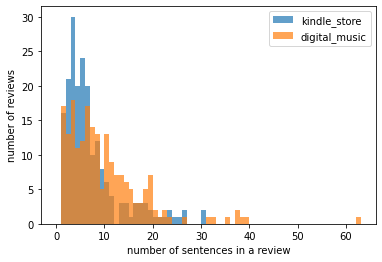

In [ ]:
#sentence segmentation
counter1 = [len(nltk.sent_tokenize(review)) for review in table1['reviewText']]
counter2 = [len(nltk.sent_tokenize(review)) for review in table2['reviewText']]

plt.hist(counter1, bins = range(max(counter1 + counter2) + 1), alpha = 0.7)
plt.hist(counter2, bins = range(max(counter1 + counter2) + 1), alpha = 0.7)
plt.xlabel('number of sentences in a review')
plt.ylabel('number of reviews')
plt.legend(['kindle_store','digital_music'])

In [ ]:
#sentence segmentation continued
np.argmax(np.array(counter2))
len(table2['reviewText'][115])

3686

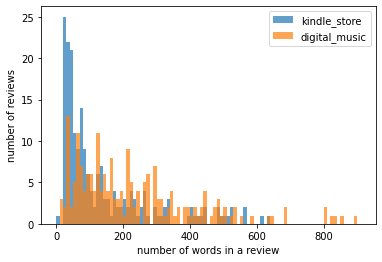

In [ ]:
#word tokenization
chunk1 = [nltk.word_tokenize(review) for review in table1['reviewText']]
chunk2 = [nltk.word_tokenize(review) for review in table2['reviewText']]
counter1 = [len(review) for review in chunk1]
counter2 = [len(review) for review in chunk2]

plt.hist(counter1, bins = range(0, max(counter1 + counter2) + 1, 10), alpha = 0.7)
plt.hist(counter2, bins = range(0, max(counter1 + counter2) + 1, 10), alpha = 0.7)
plt.xlabel('number of words in a review')
plt.ylabel('number of reviews')
plt.legend(['kindle_store','digital_music'])

C:\Users\lky\AppData\Local\Temp\ipykernel_47968\4282821113.py:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.arange(len(x1))), np.log10(x1))
C:\Users\lky\AppData\Local\Temp\ipykernel_47968\4282821113.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.arange(len(x2))), np.log10(x2))


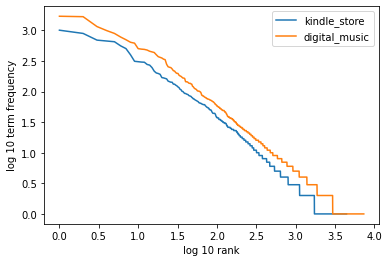

In [ ]:
#stemming

counter1, counter2 = {},{}
for tokens in chunk1:
    for token in tokens:
        if token not in counter1.keys():
            counter1[token] = 1
        else:
            counter1[token] += 1
for tokens in chunk2:
    for token in tokens:
        if token not in counter2.keys():
            counter2[token] = 1
        else:
            counter2[token] += 1

x1 = sorted(list(counter1.values()), reverse = True)
x2 = sorted(list(counter2.values()), reverse = True)
x1 = np.array(x1)
x2 = np.array(x2)
plt.plot(np.log10(np.arange(len(x1))), np.log10(x1))
plt.plot(np.log10(np.arange(len(x2))), np.log10(x2))

plt.xlabel('log 10 rank')
plt.ylabel('log 10 term frequency')
plt.legend(['kindle_store','digital_music'])

C:\Users\lky\AppData\Local\Temp\ipykernel_47968\2910983337.py:29: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.arange(len(x1))), np.log10(x1))
C:\Users\lky\AppData\Local\Temp\ipykernel_47968\2910983337.py:30: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.arange(len(x2))), np.log10(x2))


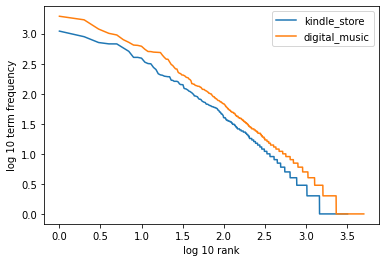

In [ ]:
#stemming continued
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

counter1, counter2 = {},{}
for tokens in chunk1:
    for token in tokens:

        #apply stemming before counting
        token = stemmer.stem(token)
        if token not in counter1.keys():
            counter1[token] = 1
        else:
            counter1[token] += 1
for tokens in chunk2:
    for token in tokens:

        #apply stemming before counting
        token = stemmer.stem(token)
        if token not in counter2.keys():
            counter2[token] = 1
        else:
            counter2[token] += 1

x1 = sorted(list(counter1.values()), reverse = True)
x2 = sorted(list(counter2.values()), reverse = True)
x1 = np.array(x1)
x2 = np.array(x2)
plt.plot(np.log10(np.arange(len(x1))), np.log10(x1))
plt.plot(np.log10(np.arange(len(x2))), np.log10(x2))

plt.xlabel('log 10 rank')
plt.ylabel('log 10 term frequency')
plt.legend(['kindle_store','digital_music'])

In [ ]:
np.sort(list(counter1.values()))

array([   1,    1,    1, ...,  890, 1005, 1129])

In [ ]:
#pos tagging
import spacy
from spacy import displacy

sents = nltk.sent_tokenize(table1['reviewText'][np.random.randint(200)])

nlp = spacy.load("en_core_web_sm")
doc = nlp(sents[np.random.randint(len(sents))])
displacy.render(doc, style = "dep")

In [ ]:
from nltk.corpus import stopwords

def is_word(str):
    for char in str:
        if not char.isalpha():
            return False
    return True 

#casefold
#stemming
def calculate_words(dataset):
    word_table = {}
    total_words = 0
    for sentence in dataset:
        tokens = nltk.word_tokenize(sentence)
        for word in tokens:
            if is_word(word):
                total_words += 1
                if word in word_table.keys() and word not in stopwords.words('english'):
                    word_table[word] += 1
                else:
                    word_table[word] = 1

    return total_words, word_table

def get_prob_list(sum, word_table):
    prob_table = {}
    for key, val in word_table.items():
        prob_table[key] = val/sum

    return prob_table

def calculate_relative_entropy(prob_table1, prob_table2):

    RE_list1 = []
    RE_list2 = []
    for key, val in prob_table1.items():

        if key in prob_table2.keys():

            relative_entropy1 = val * np.log(val / prob_table2[key])
            RE_list1.append((key, relative_entropy1))

            relative_entropy2 = prob_table2[key] * np.log(prob_table2[key] / val)
            RE_list2.append((key, relative_entropy2))

    RE_list1.sort(key = lambda x:x[1], reverse = True)
    RE_list2.sort(key = lambda x:x[1], reverse = True)

    return RE_list1, RE_list2

In [ ]:
#Measure Indicative words
loader = DataLoader(DataLoader.data_path1)
dataset1 = loader.load_review_text()

loader = DataLoader(DataLoader.data_path2)
dataset2 = loader.load_review_text()

d:\study\NTU_LEARN\AI6122 TEXT MANAGEMENT & PROCESSING\project\data_loader.py:13: FutureWarning: Starting with pandas version 2.0 all arguments of read_json except for the argument 'path_or_buf' will be keyword-only.
  self.table = pd.read_json(data_path, 'records', lines = True);
d:\study\NTU_LEARN\AI6122 TEXT MANAGEMENT & PROCESSING\project\data_loader.py:13: FutureWarning: Starting with pandas version 2.0 all arguments of read_json except for the argument 'path_or_buf' will be keyword-only.
  self.table = pd.read_json(data_path, 'records', lines = True);


In [ ]:
sum1, word_table1 = calculate_words(dataset1)
sum2, word_table2 = calculate_words(dataset2)
prob_list1 = get_prob_list(sum1, word_table1)
prob_list2 = get_prob_list(sum2, word_table2)

ind_list1, ind_list2 = calculate_relative_entropy(prob_list1, prob_list2)

In [ ]:
from wordcloud import WordCloud
K = 50

weighted = {}
for i in range(K):
    weighted[ind_list1[i][0]] = ind_list1[i][1]

wc = WordCloud(background_color="white", max_words=1000)
# generate word cloud
wc.generate_from_frequencies(weighted)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

NameError: name 'ind_list1' is not defined

In [ ]:
'I' in stopwords.words('english')

False

In [ ]:
from wordcloud import WordCloud